<a href="https://colab.research.google.com/github/ProData-Emmanuel/Climate-Change-Project/blob/master/Okeke_Emmanuel_Data_Science_Stage_C_Graded_Quiz_Hamoye_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Description

## AIM: To Predict Stability of a Grid System

Electrical grids require a balance between electricity supply and demand in order to be stable. Conventional systems achieve this balance through demand-driven electricity production. For future grids with a high share of inflexible (i.e., renewable) energy source, the concept of demand response is a promising solution. This implies changes in electricity consumption in relation to electricity price changes. **In this project, a binary classification model is was built to predict if a grid is stable or unstable using the UCI Electrical Grid Stability Simulated dataset.** (https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+)


#### It has 12 primary predictive features and two dependent variables.
**Predictive features:**	
1.	'tau1' to 'tau4': the reaction time of each network participant, a real value within the range 0.5 to 10 ('tau1' corresponds to the supplier node, 'tau2' to 'tau4' to the consumer nodes);
2.	'p1' to 'p4': nominal power produced (positive) or consumed (negative) by each network participant, a real value within the range -2.0 to -0.5 for consumers ('p2' to 'p4'). As the total power consumed equals the total power generated, p1 (supplier node) = - (p2 + p3 + p4);
3.	'g1' to 'g4': price elasticity coefficient for each network participant, a real value within the range 0.05 to 1.00 ('g1' corresponds to the supplier node, 'g2' to 'g4' to the consumer nodes; 'g' stands for 'gamma');
**Dependent variables:**
1.	'stab': the maximum real part of the characteristic differential equation root (if positive, the system is linearly unstable; if negative, linearly stable);
2.	'stabf': a categorical (binary) label ('stable' or 'unstable').

**Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 'stab' should be dropped and 'stabf' will remain as the sole dependent variable (binary classification).**


In [14]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv"
df = pd.read_csv(url)
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [47]:
df.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stabf'],
      dtype='object')

### Conducting Exploratory Data Analysis
In this dataset, there are 12 input features and 2 outputs / target features. "stab" and "stabf" have direct relationship, and one can be dropped ("stab" is dropped in this case).

In [15]:
#checking for null values in the dataset
df.isna().sum() 

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

As expected, data cleaning/ wrangling isn't required since this is a simulated dataset. So we have a clean dataset with no missing values on our hands.

In [16]:
df = df.drop(['stab'], axis=1)
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,unstable


In [17]:
#check the distribution of target variables
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [18]:
df.dtypes

tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stabf     object
dtype: object

The labels has categorical values, and can be encoded to be useful in the ML




In [19]:
# Encoding the labels using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.stabf = encoder.fit_transform(df.stabf)



In [20]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1


In [21]:
# splitting the Data set into 80-20
features_df = df.drop(columns=["stabf"])
target_var = df["stabf"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, target_var, test_size=0.2, random_state=1)


In [ ]:
x_test

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalised_train = scaler.fit_transform(x_train)
normalised_test = scaler.transform(x_test)

In [23]:
normalised_train_df = pd.DataFrame(normalised_train, columns=x_train.columns)
normalised_test_df = pd.DataFrame(normalised_test, columns=x_test.columns)
normalised_test_df.head()


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.593951,-0.412733,1.503924,1.116943,0.403423,-1.492971,-0.785033,1.566781,-0.901007,1.167203,-1.507330,1.084726
1,0.202190,0.374416,-0.188800,-0.522268,-0.225967,-1.058483,0.420047,1.028627,-1.625721,-0.395660,1.414651,1.226011
2,-1.079044,-0.313745,-0.884634,0.017080,-0.943122,0.112653,0.801335,0.733004,1.457108,-1.438495,0.651821,-1.682168
3,-0.083120,-1.107327,0.372805,-1.708152,0.753990,-1.637972,0.403805,-0.088036,0.083322,-1.672322,-0.357714,1.055865
4,0.873921,1.438466,0.086662,1.715037,-0.153880,-0.007015,-0.197053,0.472315,0.136549,-1.469731,0.956396,-0.819727


In [25]:
# Selecting a Binary Classifier model, Logistic Regression and importing the libraries

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

# Fit the Classifier with the train features
log_reg.fit(normalised_train_df, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# The trained model is ready to make predictions
pred = log_reg.predict(normalised_test_df)

MEASURING CLASSIFICATION PERFORMANCE

In [27]:
# Computing the confusion matrix for the model. Logistic Regression Confussion Matrix
# import metrics
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
cnf_mat = confusion_matrix(y_true=y_test, y_pred=pred, labels=[0,1])
cnf_mat

array([[ 494,  218],
       [ 174, 1114]])

In [28]:
# Previewing the Confusion Matrix in DataFrame
cnf_mat_df = pd.DataFrame(cnf_mat, columns=['Actual Positive', 'Actual Negative'], 
                          index=['Predicted Positive', 'Predicted Negative'])
cnf_mat_df

,Actual Positive,Actual Negative
Predicted Positive,494,218
Predicted Negative,174,1114


In [29]:
print("{} is the bumber of True Positive (TP).".format(cnf_mat_df.iloc[0,0]))
print("{} is the bumber of False Positive (FP).".format(cnf_mat_df.iloc[0,1])) # Type I error
print("{} is the bumber of True Negative (TP).".format(cnf_mat_df.iloc[1,0]))
print("{} is the bumber of False Negative (TP).".format(cnf_mat_df.iloc[1,1]))  # Type II error

494 is the bumber of True Positive (TP).
218 is the bumber of False Positive (FP).
174 is the bumber of True Negative (TP).
1114 is the bumber of False Negative (TP).


In [30]:
# Calculate Accuracy
# NOTE: Accuracy is only accurate if the model is balanced. It will give inaccurate results if there is a class imbalance.

accuracy = accuracy_score(y_true=y_test, y_pred=pred)
print('Accuracy: {}'.format(round(accuracy*100), 2))

Accuracy: 80.0


In [31]:
# PRECISION 
# Precision is the ratio of correctly predicted instances of a class to the total number of items predicted by the model to be in that class

precision = precision_score(y_true=y_test, y_pred=pred, pos_label=0)
print('Precision: {}'.format(round(precision*100), 2))

Precision: 74.0


In [32]:
# Recall

recall = recall_score(y_true=y_test, y_pred=pred, pos_label=0)
print("Recall: {}".format(round(recall*100), 2))

Recall: 69.0


In [33]:
# F1_Score

f1 = f1_score(y_true=y_test, y_pred=pred, pos_label=0)
print("F1: {}".format(round(f1*100),2))

F1: 72.0


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, digits=4))

              precision    recall  f1-score   support

           0     0.7395    0.6938    0.7159       712
           1     0.8363    0.8649    0.8504      1288

    accuracy                         0.8040      2000
   macro avg     0.7879    0.7794    0.7832      2000
weighted avg     0.8019    0.8040    0.8025      2000



Performing Evaluation Operation techniques for improving performance

In [45]:
# Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, normalised_train_df, y_train, cv=None, scoring=None)
scores*100

array([82.3125, 82.25  , 82.5   , 81.5625, 80.125 ])

## Training a Random Forest Classifier

In [104]:
# Training a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=1)

# Train the model using the training sets
classifier.fit(normalised_train_df, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

**The above output shows different parameter values of the trained random forest classifier.**

In [105]:
# Predict on the test set
rfc_pred = classifier.predict(normalised_test_df)

In [106]:
# Check Random Forest Classifier Model Accuracy using actual and predicted values from the test data
print("Accuracy:", accuracy_score(y_test, rfc_pred))

Accuracy: 0.929


In [107]:
print(classification_report(y_test, rfc_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9191    0.8778    0.8980       712
           1     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



We can notice improvement in our predictions. Accuracy with Logistic Regressor model was **80%**, but our Random Forest Classifier model performed better with an accuracy of **92%** (as expected) 

In [108]:
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(x_train.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

feature_importances_df

,feature,importance
1,tau2,0.126307
0,tau1,0.124432
2,tau3,0.122057
3,tau4,0.121401
10,g3,0.100325
9,g2,0.097689
11,g4,0.097048
8,g1,0.090765
5,p2,0.031411
6,p3,0.029956


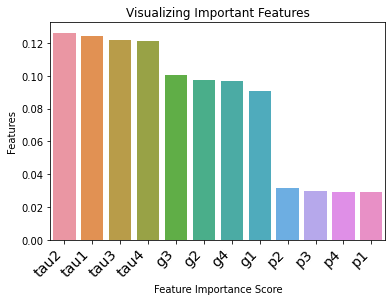

In [109]:
# visualize important featuers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")

plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

## Training an Extra Tree Classifier

In [110]:
#extra tree classifier
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier(random_state=1)
extratree.fit(normalised_train_df, y_train)


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

In [111]:
extratree_pred = extratree.predict(normalised_test_df)

In [114]:
# Setting the Hyperparameters
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9] 
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [123]:
from sklearn.model_selection import RandomizedSearchCV
extra_random = RandomizedSearchCV(
                          extratree, hyperparameter_grid, random_state=1, cv=5,
                          n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1
                          )
extra_random.fit(normalised_train_df, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                        

In [124]:
#checking for the best parameter for the model
search.best_params_.values()

dict_values([1000, 2, 8, None])

# Creating the Optimal Extra Trees Classifier with the above optimal parameters

In [126]:
# Using the searched parameters build a model with the best performance
besttree_param = ExtraTreesClassifier(n_estimators=1000, min_samples_split=2, 
                                 min_samples_leaf=8, max_features=None)
besttree_param.fit(normalised_train_df, y_train)
besttree_param_pred = besttree_param.predict(normalised_test_df)

In [129]:
# Classification report after this hyperparameter tuning
print(classification_report(y_test, besttree_param_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       712
           1       0.93      0.96      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000



## Finding the feature importance using the optimal Extra Trees Classifier Model

In [136]:
# check Important features Using the Optimal Extra Trees model.
# we will make use of the trained model

feature_importances_df = pd.DataFrame(
    {"feature": list(x_train.columns), "importance": besttree_param.feature_importances_}
).sort_values("importance", ascending=False)

feature_importances_df

,feature,importance
1,tau2,0.140477
0,tau1,0.137940
3,tau4,0.135438
2,tau3,0.134168
10,g3,0.112116
11,g4,0.109614
9,g2,0.108112
8,g1,0.102480
6,p3,0.005469
5,p2,0.005372


And use xgboost and lightgbm to train an extreme boosting model and a light gradient boosting model.

### **Training an Extreme Boosting Model**, XGBOOST



In [130]:
# Using xgboost to create an extreme gradient boosting model
from xgboost import XGBClassifier
extreme = XGBClassifier(random_state=1)
extreme.fit(normalised_train_df, y_train)
extreme_pred = extreme.predict(normalised_test_df)

In [133]:
# Classification report for the xgboost classifier 
print(classification_report(y_test, extreme_pred))


              precision    recall  f1-score   support

           0       0.92      0.85      0.88       712
           1       0.92      0.96      0.94      1288

    accuracy                           0.92      2000
   macro avg       0.92      0.90      0.91      2000
weighted avg       0.92      0.92      0.92      2000



**This xgboost model gives an accuracy of 92%**

In [134]:
# Using lightgbm to create a light gradient boosting model
from lightgbm import LGBMClassifier
light = LGBMClassifier()
light.fit(normalised_train_df, y_train)
light_pred = light.predict(normalised_test_df)

In [135]:
# Classification report for the lightgbm classifier created above
print(classification_report(y_test, light_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       712
           1       0.94      0.96      0.95      1288

    accuracy                           0.94      2000
   macro avg       0.94      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000



**This lightgbm model has an accuracy of 92%**